In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [12]:
dataset=pd.read_csv("/content/loan_data_set.csv")
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [13]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<ipython-input-14-eb4d0a3ce6fe>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['CoapplicantIncome'])


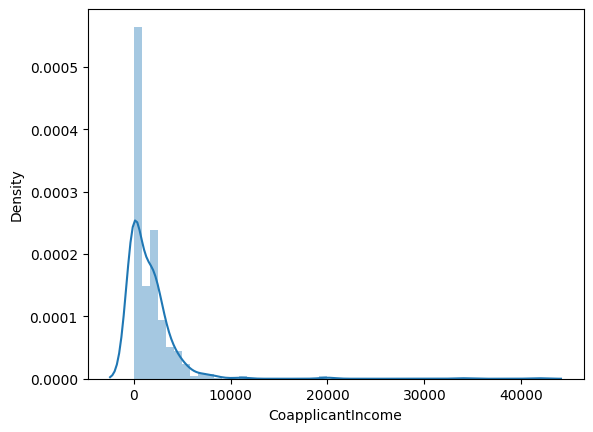

In [14]:
sns.distplot(dataset['CoapplicantIncome'])
plt.show()

In [15]:
q1=dataset['CoapplicantIncome'].quantile(0.25)
q3=dataset['CoapplicantIncome'].quantile(0.75)
iqr=q3-q1

In [16]:
min_r=q1-(1.5*iqr)
max_r=q3+(1.5*iqr)
min_r, max_r

(-3445.875, 5743.125)

In [17]:
dataset=dataset[dataset['CoapplicantIncome']<=max_r]

<ipython-input-18-eb4d0a3ce6fe>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['CoapplicantIncome'])


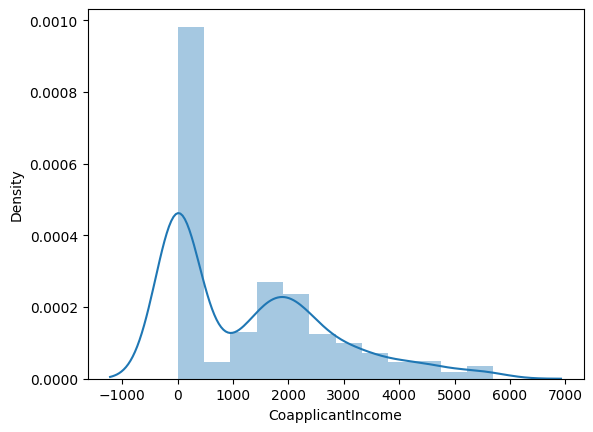

In [18]:
sns.distplot(dataset['CoapplicantIncome'])
plt.show()

In [20]:
from sklearn.preprocessing import FunctionTransformer

ft=FunctionTransformer(func=np.log1p)

In [21]:
ft.fit(dataset[['CoapplicantIncome']])

FunctionTransformer(func=<ufunc 'log1p'>)

In [24]:
dataset['CoapplicantIncome_TF']=ft.transform(dataset[['CoapplicantIncome']])

<ipython-input-24-b0065bea1e4c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['CoapplicantIncome_TF']=ft.transform(dataset[['CoapplicantIncome']])


<ipython-input-26-529c87c2dd8c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['CoapplicantIncome'])
<ipython-input-26-529c87c2dd8c>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['CoapplicantIncome_TF'])


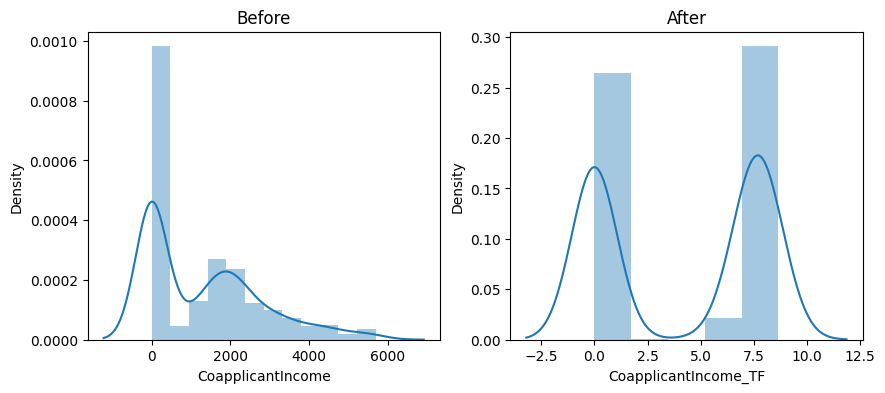

In [26]:
plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
sns.distplot(dataset['CoapplicantIncome'])
plt.title("Before")

plt.subplot(1,2,2)
sns.distplot(dataset['CoapplicantIncome_TF'])
plt.title("After")
plt.show()